In [20]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.model_selection import train_test_split

In [21]:
df=pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [22]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [23]:
data=df.dropna()

In [24]:
X=data[['Rooms','Type','Postcode','Regionname','Propertycount']]
y=data['Price']

                  Rooms     Price  Postcode  Propertycount  Distance
Rooms          1.000000  0.412438  0.092053      -0.057378  0.278666
Price          0.412438  1.000000  0.003112      -0.060769 -0.253668
Postcode       0.092053  0.003112  1.000000      -0.000937  0.504441
Propertycount -0.057378 -0.060769 -0.000937       1.000000  0.007633
Distance       0.278666 -0.253668  0.504441       0.007633  1.000000


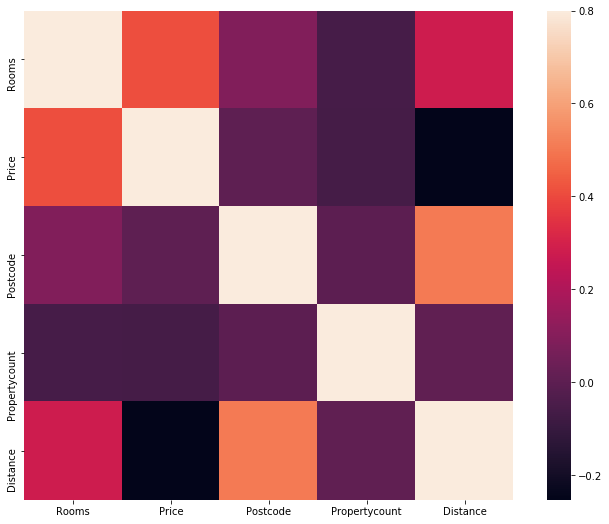

In [28]:
corrmat = data.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [26]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=4)
X = data[['Rooms', 'Postcode']]
y = data.Price
neighbors.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

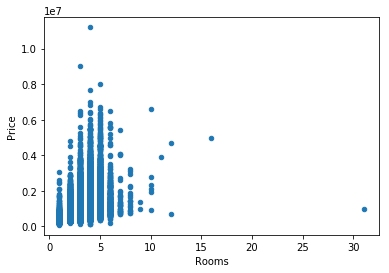

In [34]:
data.plot(x='Rooms', y='Price', kind='scatter')
plt.show()

In [35]:
neighbors.predict([[2,3067 ]])

array([760000.])

In [42]:
import statsmodels.api as sm

reg1 = sm.OLS(endog=data['Price'], exog=data[['Rooms', 'Postcode']], missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [43]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [44]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                 8.731e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:03:49   Log-Likelihood:            -7.0810e+05
No. Observations:               48433   AIC:                         1.416e+06
Df Residuals:                   48431   BIC:                         1.416e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rooms       2.623e+05   2611.467    100.450      0.0